Problem Statement : Customer Segmentation ( Home credit is a bank and it has 0.3 Millilon customers.The business partners would like to know the patterns of customers for effective targetting )

In [ ]:
###

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Step1 : Reading the dataset

In [2]:
df=pd.read_csv("application_train.csv") #home-credit

Step2 : Optimizing the dataset
    1.Reduce the memory consumed by dataset
    2.Pickle Files
    3.Take a sample

In [3]:
df.shape
df=df.sample(10000)# ( In industry , 20 % of population is considered as good sample when the data is not biased )

In [4]:
df.shape

(10000, 122)

In [5]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
137550,259531,0,Cash loans,F,N,N,2,270000.0,545040.0,35617.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
60119,169709,0,Cash loans,F,N,Y,0,315000.0,1971072.0,68643.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
165631,292003,0,Cash loans,F,N,Y,1,202500.0,361462.5,17518.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
83659,197028,0,Cash loans,F,N,N,0,135000.0,1575000.0,43312.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
177759,305996,0,Cash loans,F,N,Y,1,162000.0,1535715.0,45031.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


Step3 : Identify the important columns:
        1.The Mckinsey Way
        2.Statistical Importance

In [6]:
df_new=df.drop('SK_ID_CURR',axis=1)

In [18]:
priority_columns=df_new.var().sort_values().tail(10).index

In [19]:
priority_columns

Index(['OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'DAYS_BIRTH', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL',
       'DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT'],
      dtype='object')

In [20]:
df_new=df_new[priority_columns]

In [21]:
df_new.head()

,OWN_CAR_AGE,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_BIRTH,AMT_ANNUITY,AMT_INCOME_TOTAL,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT
137550,NaN,-1769.0,-5036,-2845.0,-12404,35617.5,270000.0,-3510,450000.0,545040.0
60119,NaN,-893.0,-4282,-7903.0,-23388,68643.0,315000.0,365243,1800000.0,1971072.0
165631,NaN,-2053.0,-233,-5396.0,-16690,17518.5,202500.0,-3349,274500.0,361462.5
83659,NaN,-2617.0,-3936,-1314.0,-12176,43312.5,135000.0,-3661,1575000.0,1575000.0
177759,NaN,-1788.0,-3193,-2167.0,-12673,45031.5,162000.0,-1236,1341000.0,1535715.0


### Null value tretaement

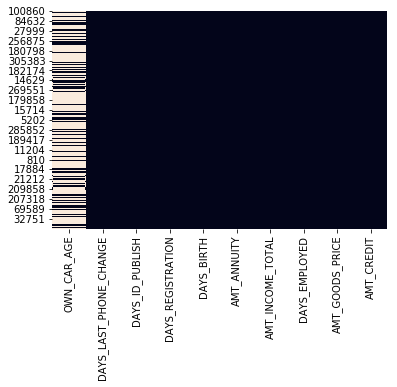

In [12]:
sns.heatmap(df_new.isna(),cbar=False)

In [15]:
df_new.shape

(10000, 10)

In [16]:
df_new.dtypes

OWN_CAR_AGE               float64
DAYS_LAST_PHONE_CHANGE    float64
DAYS_ID_PUBLISH             int64
DAYS_REGISTRATION         float64
DAYS_BIRTH                  int64
AMT_ANNUITY               float64
AMT_INCOME_TOTAL          float64
DAYS_EMPLOYED               int64
AMT_GOODS_PRICE           float64
AMT_CREDIT                float64
dtype: object

In [17]:
for i in df_new.columns:
    df_new[i].fillna(df_new[i].median(),inplace=True)

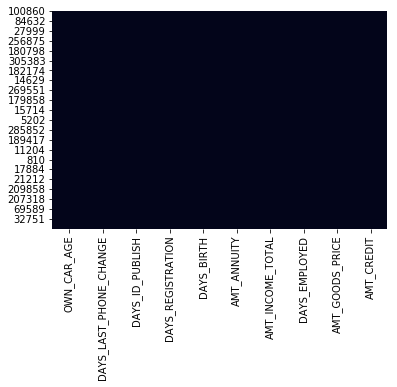

In [18]:
sns.heatmap(df_new.isna(),cbar=False)

### Outlier Treatement

In [19]:
df_new.describe()

,OWN_CAR_AGE,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_BIRTH,AMT_ANNUITY,AMT_INCOME_TOTAL,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04
mean,10.008000,-952.591100,-2985.180600,-5007.745500,-15997.888100,27188.200350,1.678859e+05,64377.730400,5.404392e+05,6.024640e+05
std,7.092205,825.924675,1511.898902,3535.251956,4349.861695,14571.025052,9.000373e+04,141748.417666,3.706720e+05,4.040183e+05
min,0.000000,-3782.000000,-6219.000000,-21249.000000,-25196.000000,1980.000000,2.610000e+04,-16113.000000,4.500000e+04,4.500000e+04
25%,9.000000,-1554.250000,-4282.250000,-7524.000000,-19606.250000,16659.000000,1.125000e+05,-2720.250000,2.385000e+05,2.700000e+05
50%,9.000000,-741.000000,-3262.000000,-4538.500000,-15704.500000,25317.000000,1.485000e+05,-1208.000000,4.500000e+05,5.212800e+05
75%,9.000000,-266.000000,-1692.000000,-2021.250000,-12373.000000,34465.500000,2.025000e+05,-274.750000,6.795000e+05,8.087715e+05
max,65.000000,0.000000,-1.000000,0.000000,-7683.000000,225000.000000,1.215000e+06,365243.000000,3.600000e+06,4.027680e+06


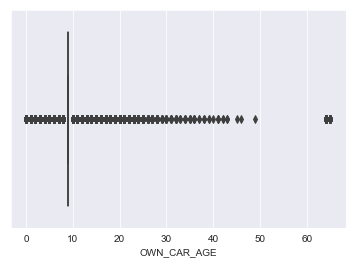

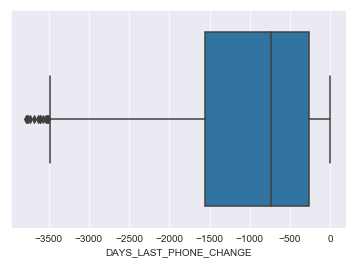

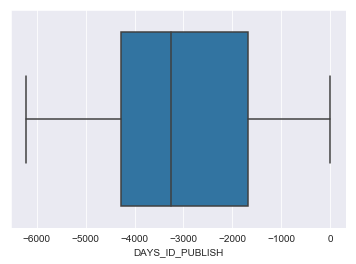

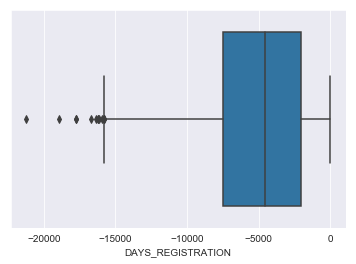

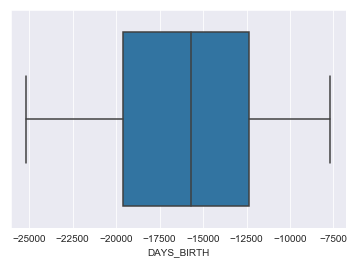

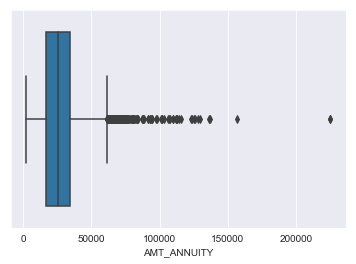

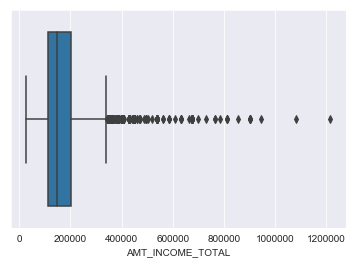

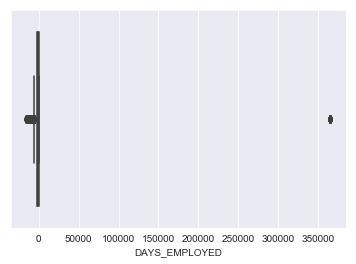

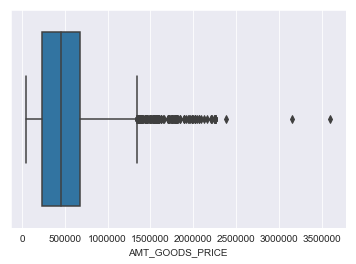

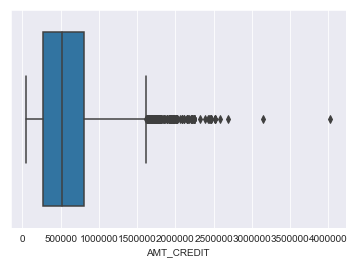

In [20]:
sns.set_style("darkgrid")
for i in df_new.columns:
    sns.boxplot(df_new[i])
    plt.show()

In [ ]:
### outlier Treatement

In [21]:
for i in df_new.columns:
    x=df_new[i].values
    

In [ ]:
### Univariate Analysis
### Bivariate Analysis
### Correelation Analysis

In [22]:
len(df_new.columns)

10

In [23]:
sns.set_style("white")

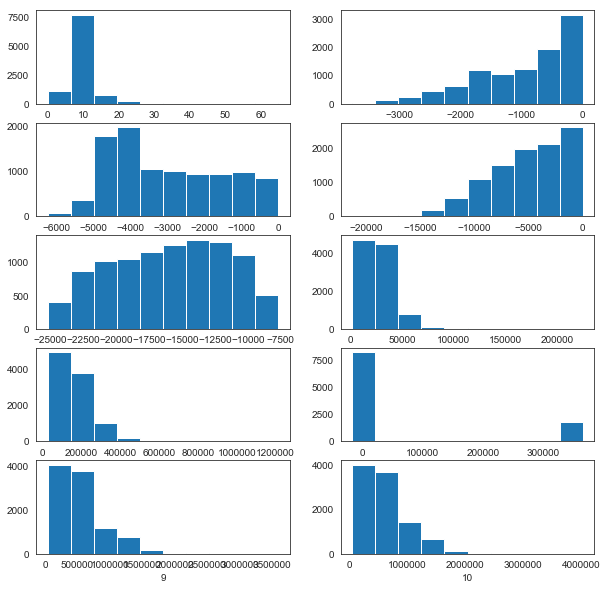

In [24]:
plt.figure(figsize=(10,10))
for i in range(1,11):
    plt.subplot(5,2,i)
    plt.hist(df_new[df_new.columns[i-1]])
    plt.xlabel(i)
    

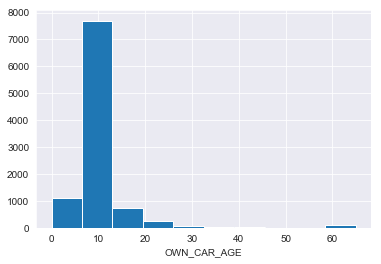

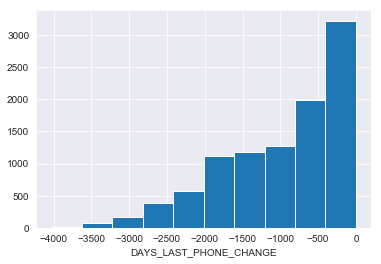

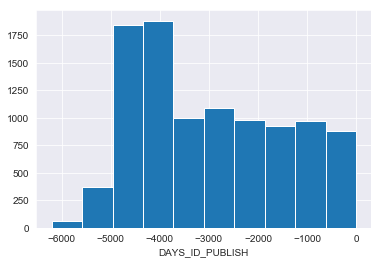

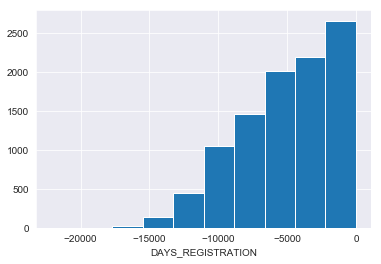

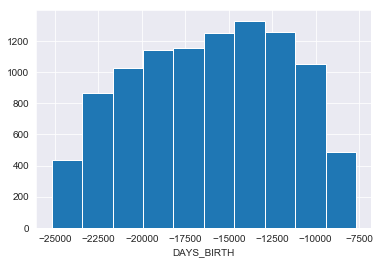

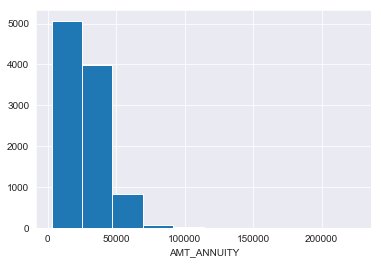

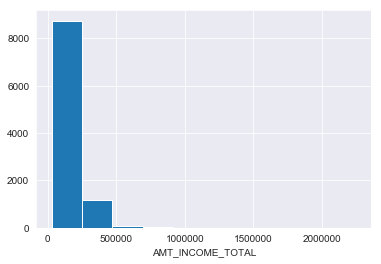

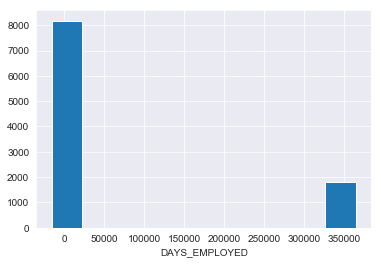

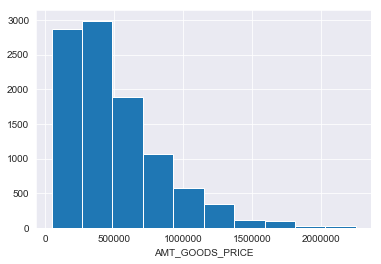

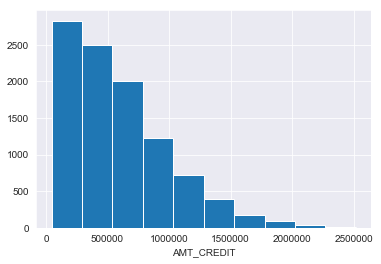

In [53]:
for i in df_new.columns:
    plt.hist(df_new[i])
    plt.xlabel(i)
    plt.show()

In [26]:
df_new1=df_new.sample(100)

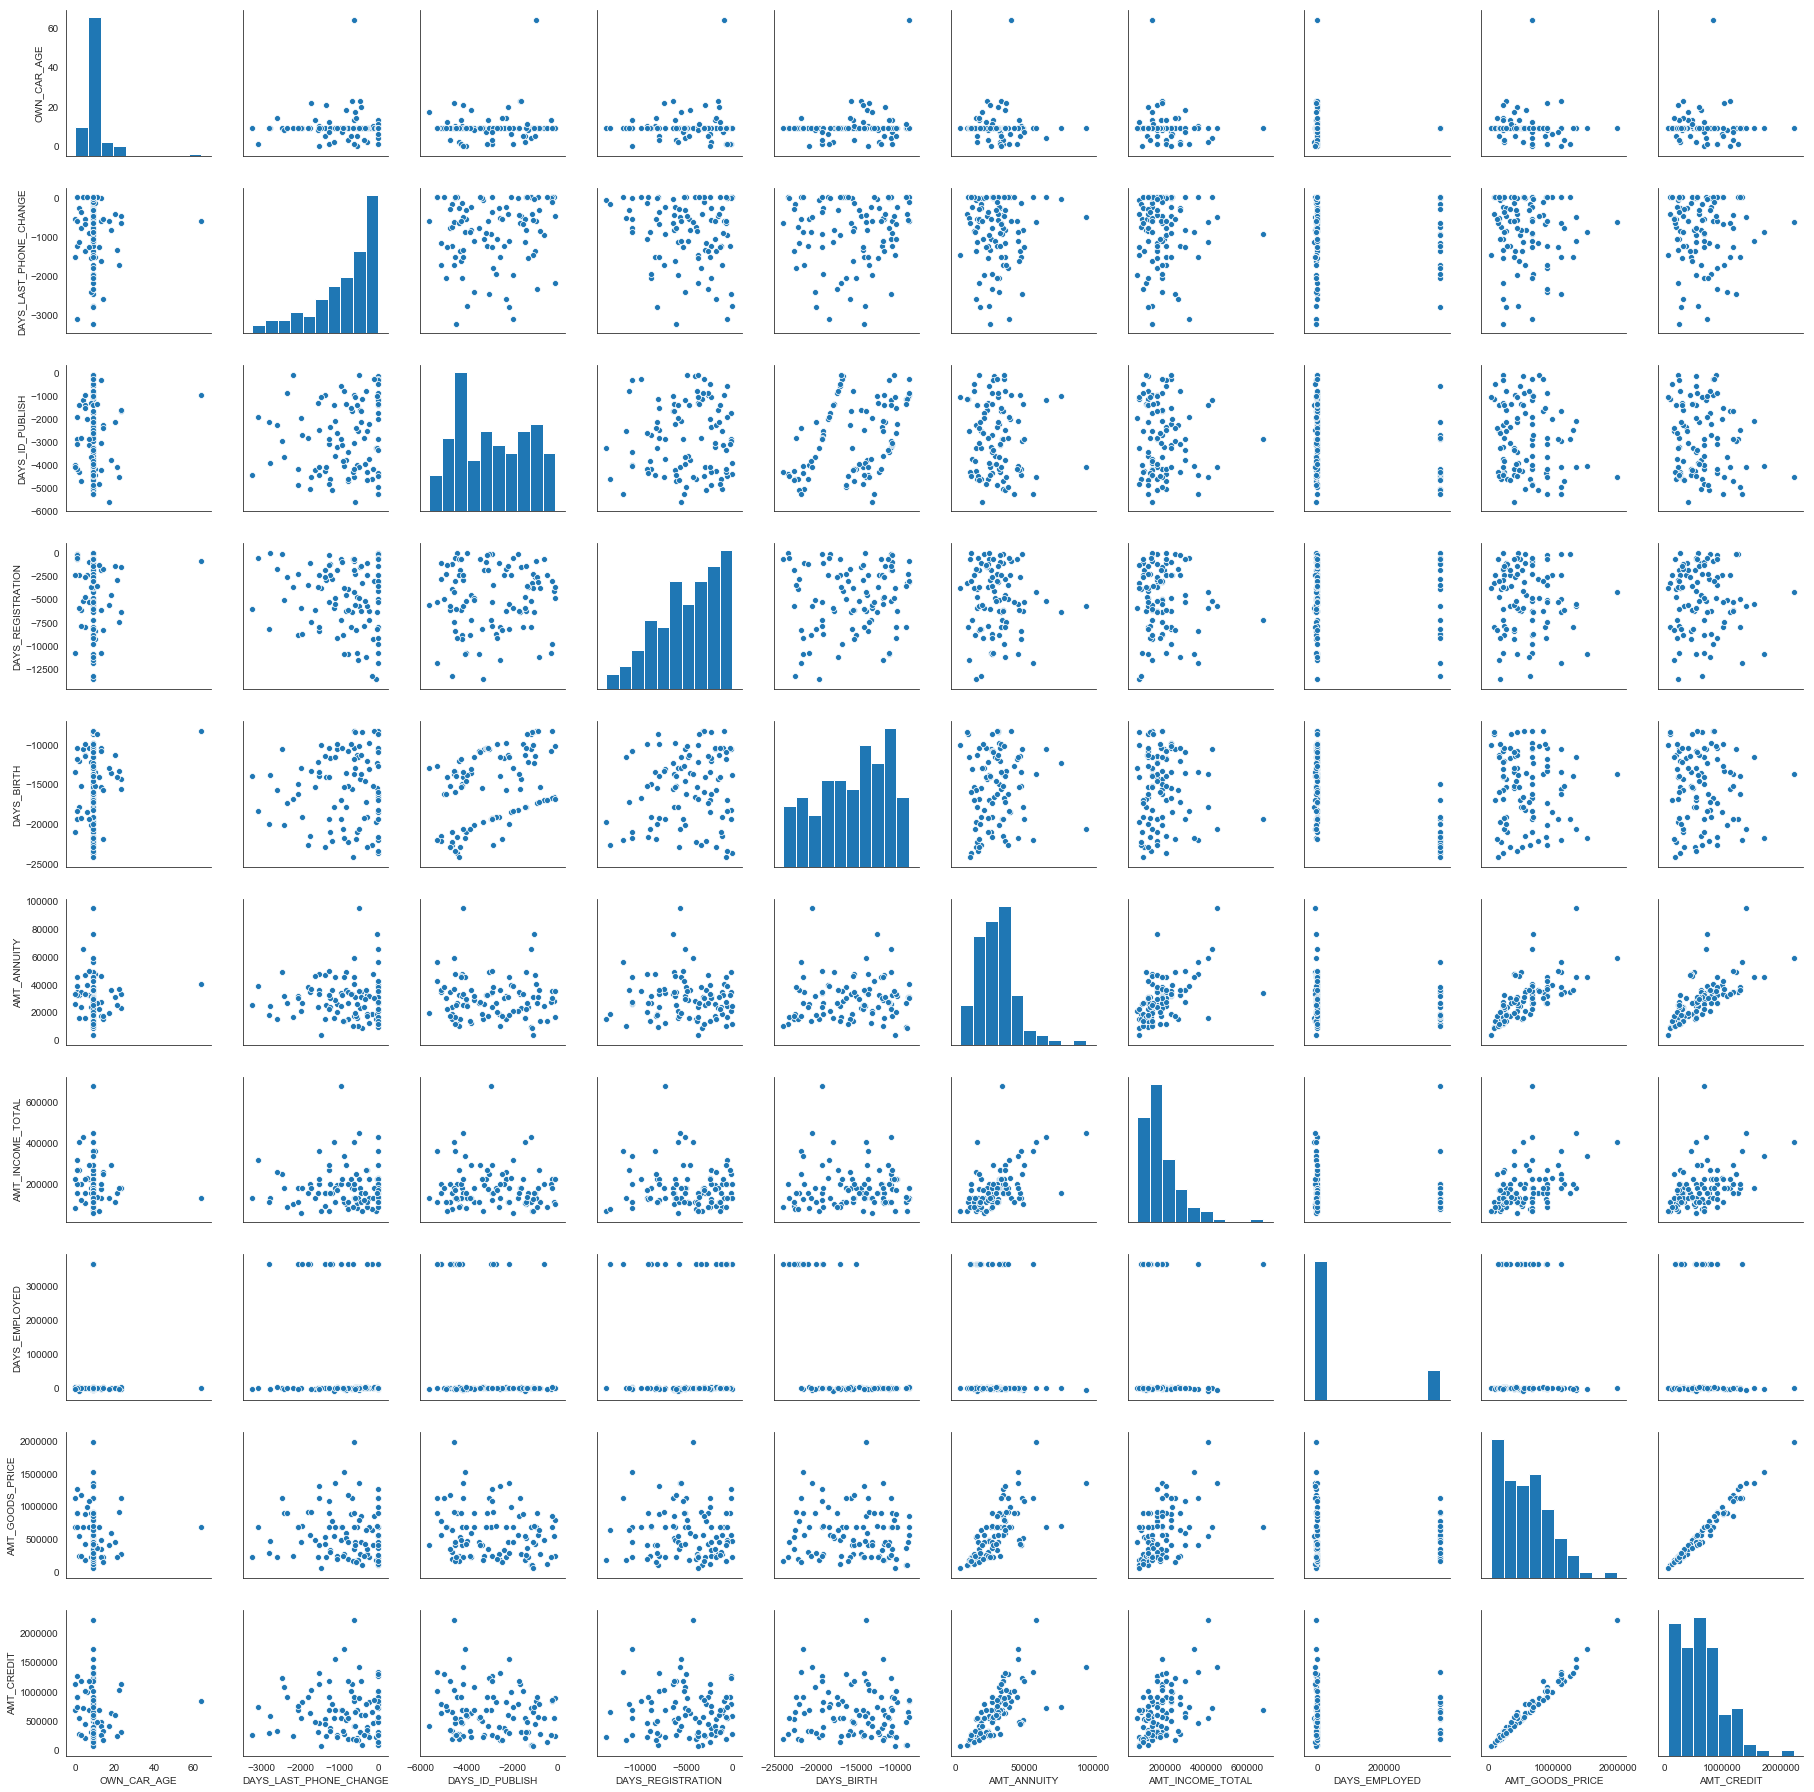

In [27]:
sns.pairplot(df_new1)

In [ ]:
#### MinMax Scaling

In [ ]:
### A Standard Scale (0-1)

In [39]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
mn.fit(df_new)
train=mn.transform(df_new)

In [41]:
train=pd.DataFrame(train)

In [42]:
train.columns=df_new.columns

In [45]:
train.head(2)


,OWN_CAR_AGE,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_BIRTH,AMT_ANNUITY,AMT_INCOME_TOTAL,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT
0,0.138462,0.123480,0.267289,0.884136,0.547136,0.244956,0.148372,0.029597,0.308861,0.323426
1,0.138462,0.873347,0.694436,0.676973,0.386798,0.108676,0.148372,0.041263,0.177215,0.191743


In [46]:
### Model Building

In [51]:
### How to identify the right number of clusters

In [52]:
### k Elbow

In [ ]:
10000 
 Cal var
    
6000 4000 -- Var

3000 3000 4000 -- var

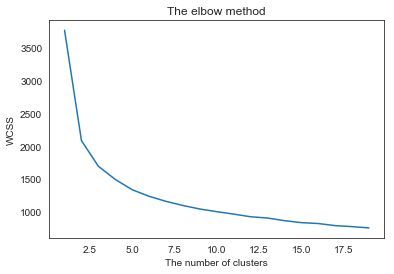

In [57]:

# Using the elbow method to find the optimal number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
x = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(train)
    x.append(kmeans.inertia_)

plt.plot(range(1,20), x)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('variance')
plt.show()

In [58]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
km.fit(train)
km.labels_

array([2, 4, 0, ..., 4, 2, 0])

In [59]:
len(km.labels_)

10000

In [61]:
df_new['cluster']=km.labels_

In [70]:
df_new.groupby('cluster').count()

,OWN_CAR_AGE,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_BIRTH,AMT_ANNUITY,AMT_INCOME_TOTAL,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT
cluster,,,,,,,,,,
0,1816,1816,1816,1816,1816,1816,1816,1816,1816,1816
1,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111
2,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801
3,2223,2223,2223,2223,2223,2223,2223,2223,2223,2223
4,2049,2049,2049,2049,2049,2049,2049,2049,2049,2049


In [71]:
df_new.groupby('cluster').mean()

,OWN_CAR_AGE,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_BIRTH,AMT_ANNUITY,AMT_INCOME_TOTAL,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT
cluster,,,,,,,,,,
0,9.550110,-923.765969,-3899.809471,-6512.466410,-21798.813326,24340.338932,137648.138912,365243.000000,498027.890419,555321.776432
1,10.431549,-575.447181,-1770.936049,-3372.580767,-10661.147797,25324.782804,161334.786594,-1300.242065,448545.325438,500153.832307
2,10.302054,-2027.698501,-3933.203776,-4913.328151,-15112.446419,28266.656302,178328.528595,-2829.609106,576705.513048,640446.191560
3,9.905533,-425.358525,-4181.093117,-4944.511921,-15560.911831,28194.874494,178202.257085,-2475.836257,556182.605263,621393.748988
4,9.830161,-993.716935,-1294.795510,-5510.367984,-17607.188873,29591.936310,181063.236457,-3005.984871,623744.896779,695728.972182


In [72]:
### interpretations

In [81]:
mean_values=df_new[df_new['cluster']==1]['AMT_INCOME_TOTAL'].mean()

In [82]:
c1=df_new[df_new['cluster']==1]

In [85]:
c1[c1['AMT_INCOME_TOTAL']<mean_values].shape

(1328, 11)

In [86]:
c1.shape

(2111, 11)

In [87]:
mean_values

161334.78659403126

In [92]:
abs(c1[c1['AMT_INCOME_TOTAL']<mean_values]['AMT_INCOME_TOTAL']-mean_values).sum(0)

60201941.09687352

In [94]:
c1[c1['AMT_INCOME_TOTAL']<mean_values].index

Int64Index([ 89343, 208526,   9563, 228816, 121388, 227279,  87153,  53366,
            137147, 275158,
            ...
            304610, 195863,  42237,  37809,  84458, 189192,  58716,  34901,
            135564, 264905],
           dtype='int64', length=1328)

In [96]:
df.shape

(10000, 122)

In [98]:
df=pd.read_csv("E:\\Backup\\application_train.csv")

In [101]:
final_table=pd.DataFrame()
for i in c1[c1['AMT_INCOME_TOTAL']<mean_values].index:
    for j in df.index:
        if i==j:
            final_table.append(df[i:i+1])

In [102]:
final_table.to_exce("test.xlsx")

""
